In [4]:
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Essai 1


In [5]:
def count_word_occurrences(book_path, years_df_path):
    # Charger les données des années de publication
    years_df = pd.read_csv(years_df_path)

    # Initialiser un dictionnaire pour stocker les occurrences des mots par année
    word_counts_by_year = {}

    # Parcourir chaque ligne du DataFrame
    for index, row in years_df.iterrows():
        year = row['Année']
        title = str(row['Titre'])
        book_path_full = os.path.join(book_path, f'{title}')
        
        # Lire le contenu de tous les fichiers de pages dans le dossier du livre
        text = ''
        for page_file in os.listdir(book_path_full):
            page_path = os.path.join(book_path_full, page_file)
            with open(page_path, 'r', encoding='utf-8') as file:
                text += file.read() + ' '
        
        # Compter les occurrences des mots
        words = text.split()
        word_counts = Counter(words)
        
        # Ajouter les occurrences des mots au dictionnaire
        if year not in word_counts_by_year:
            word_counts_by_year[year] = Counter()
        word_counts_by_year[year].update(word_counts)
    
    return word_counts_by_year

#counts_mixtes = count_word_occurrences('../data/txt/ouvrages_mixtes', '../data/contexte/years_mixtes_p2.csv')
counts_femmes = count_word_occurrences('../data/txt/ouvrages_feminins', '../data/contexte/years_feminins_p2.csv')
counts_hommes = count_word_occurrences('../data/txt/ouvrages_masculins', '../data/contexte/years_masculins_p2.csv')



In [7]:
def count_word_occurrences(book_path, years_df_path):
    # Charger les données des années de publication
    years_df = pd.read_csv(years_df_path)

    # Initialiser un dictionnaire pour stocker les occurrences des mots par année
    word_counts_by_year = {}

    # Parcourir chaque ligne du DataFrame
    for index, row in years_df.iterrows():
        year = row['Année']
        title = row['Titre']
        book_path_full = os.path.join(book_path, f'0{title}')
        
        # Lire le contenu de tous les fichiers de pages dans le dossier du livre
        text = ''
        for page_file in os.listdir(book_path_full):
            page_path = os.path.join(book_path_full, page_file)
            with open(page_path, 'r', encoding='utf-8') as file:
                text += file.read() + ' '
        
        # Compter les occurrences des mots
        words = text.split()
        word_counts = Counter(words)
        
        # Ajouter les occurrences des mots au dictionnaire
        if year not in word_counts_by_year:
            word_counts_by_year[year] = Counter()
        word_counts_by_year[year].update(word_counts)
    
    return word_counts_by_year

counts_mixtes = count_word_occurrences('../data/txt/ouvrages_mixtes', '../data/contexte/years_mixtes_p2.csv')

In [9]:
# Liste des mots à rechercher
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

nltk_stopwords = set(stopwords.words('french')+ [
    "alors", "au", "aucuns", "aussi", "autre", "avant", "avec", "avoir", "bon", "car", "ce", "cela", "ces", "ceux", 
    "chaque", "ci", "comme", "comment", "dans", "des", "du", "dedans", "dehors", "depuis", "devrait", "doit", "donc", 
    "dos", "début", "elle", "elles", "en", "encore", "essai", "est", "et", "eu", "fait", "faites", "fois", "font", 
    "hors", "ici", "il", "ils", "je", "juste", "la", "le", "les", "leur", "là", "ma", "maintenant", "mais", "mes", 
    "mine", "moins", "mon", "mot", "même", "ni", "nommés", "notre", "nous", "nouveaux", "ou", "où", "par", "parce", 
    "pas", "peut", "peu", "plupart", "pour", "pourquoi", "quand", "que", "quel", "quelle", "quelles", "quels", "qui", 
    "sa", "sans", "ses", "seulement", "si", "sien", "son", "sont", "sous", "soyez", "sujet", "sur", "ta", "tandis", 
    "tellement", "tels", "tes", "ton", "tous", "tout", "trop", "très", "tu", "valeur", "voie", "voient", "vont", 
    "votre", "vous", "vu", "ça", "étaient", "état", "étions", "été", "être", "de", "a", "4", "-", "une", "plus","7", 
    "un", "se", "'","_",'‘', 'ne', "cette", "bien", "toujours", "si", "aussi", "peu", "deux", "trois", "quatre", "cinq",
    "nature", "faire", "faut", "peut", "doit", "doivent", "peuvent", "peu", "peuvent", "peut", "peut", "peut", "peut",
    'chez', 'méme', "soit", "dont", "non", "tous", "toutes", "toute", "toute", "toute", "toute", "toute", "toute", "toute",
    'c’est', "dune", "d’une", "tant", "ainsi", "cest", "surtout", "étre", "pourtant", "souvent", "trés", "leurs", "quelques", 
    " ", "pendant", "aprés", "autres", "ment", "celle", "beaucoup"
])
words_to_search = ['préservatif', 'preservatif', 'préservatifs', 'preservatifs','preservative', 'preservatives', 'preserv',
                   'clitoris', 
                   'condom', 'condoms',
                   'tampon', 'tampons', 
                   'éponge', 'eponge', 'éponges', 'eponges', 
                   'vagin', 'vagins', 'vaginal', 'vaginaux',
                   'pessaire', 'pessaires']


def count_word_occurrences_normalized(book_path, years_df_path, words_to_search):
    # Charger les données des années de publication
    years_df = pd.read_csv(years_df_path)

    # Initialiser un dictionnaire pour stocker les occurrences des mots par année
    word_counts_by_year = {}

    # Liste des mots à ignorer
    words_to_ignore = set(nltk_stopwords)

    # Parcourir chaque ligne du DataFrame
    for index, row in years_df.iterrows():
        year = row['Année']
        title = str(row['Titre'])
        book_path_full = os.path.join(book_path, f'{title}')
        
        # Lire le contenu de tous les fichiers de pages dans le dossier du livre
        text = ''
        for page_file in os.listdir(book_path_full):
            page_path = os.path.join(book_path_full, page_file)
            with open(page_path, 'r', encoding='utf-8') as file:
                text += file.read() + ' '
        
        # Compter les occurrences des mots
        words = text.split()
        count_words = [word for word in words if word in words_to_search and word not in words_to_ignore and len(word) > 3]
        word_counts = Counter(count_words)
        
        # Ajouter les occurrences des mots au dictionnaire
        if year not in word_counts_by_year:
            word_counts_by_year[year] = Counter()
        word_counts_by_year[year].update(word_counts)
    
    return word_counts_by_year

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
counts_femmes = count_word_occurrences_normalized('../data/txt/ouvrages_feminins', '../data/contexte/years_feminins_p2.csv', words_to_search)
counts_hommes = count_word_occurrences_normalized('../data/txt/ouvrages_masculins', '../data/contexte/years_masculins_p2.csv', words_to_search)

In [11]:
def get_total_count(words_list, counter):
    total_count = {year: 0 for year in counter.keys()}
    for year in counter.keys():
        for word in words_list:
            total_count[year] += counter[year][word]
    return total_count

# Exemple d'utilisation
preservatif_list = ['préservatif', 'preservatif', 'préservatifs', 'preservatifs','preservative', 'preservatives', 'preserv',]
counter = counts_hommes
total_preservatif = get_total_count(preservatif_list, counter)
tampons_list = ['tampon', 'tampons']
total_tampons = get_total_count(tampons_list, counter)
condoms_list = ['condom', 'condoms']
total_condoms = get_total_count(condoms_list, counter)
eponges_list = ['éponge', 'eponge', 'éponges', 'eponges']
total_eponges = get_total_count(eponges_list, counter)
vagins_list = ['vagin', 'vagins', 'vaginal', 'vaginaux']
total_vagins = get_total_count(vagins_list, counter)
pessaires_list = ['pessaire', 'pessaires']
total_pessaires = get_total_count(pessaires_list, counter)
clitoris_list = ['clitoris']
total_clitoris = get_total_count(clitoris_list, counter)


In [12]:

def plot_word_occurrences_bar(counts, title):
    years = list(counts.keys())
    occurrences = [counts[year] for year in years]

    plt.figure(figsize=(10, 5))
    plt.bar(years, occurrences, color='blue')
    plt.xlabel('Year')
    plt.ylabel('Occurrences')
    plt.title(title)
    plt.show()


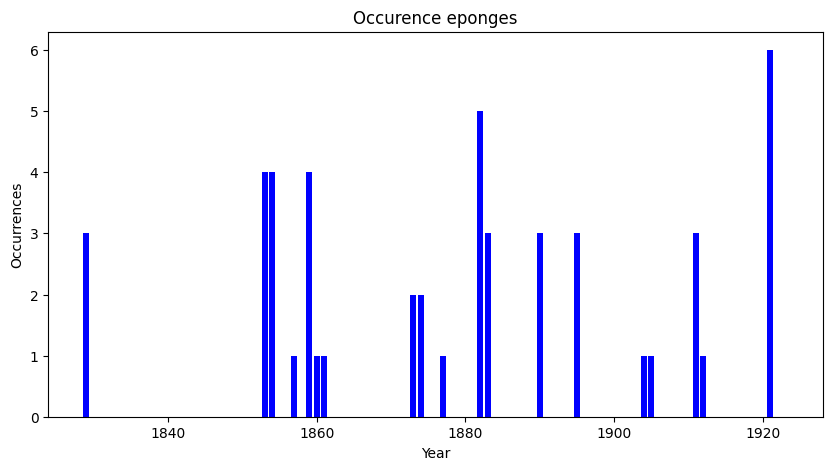

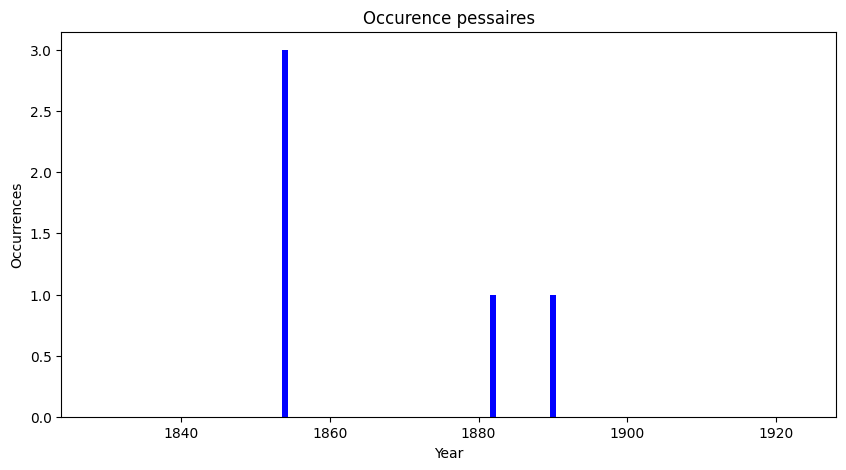

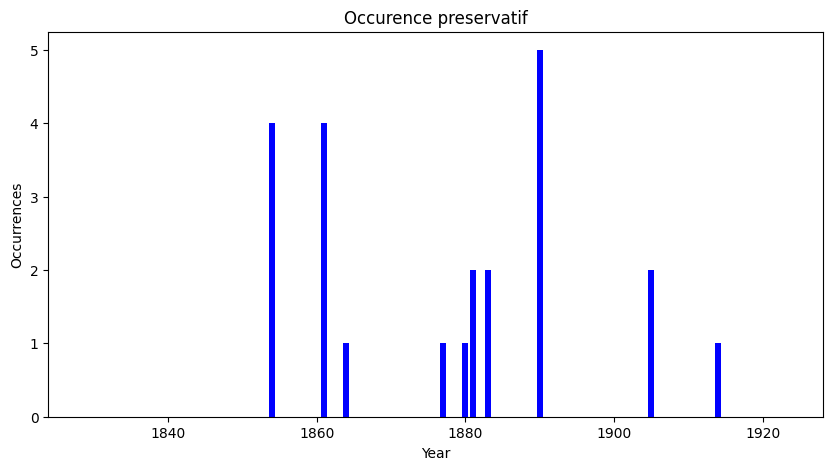

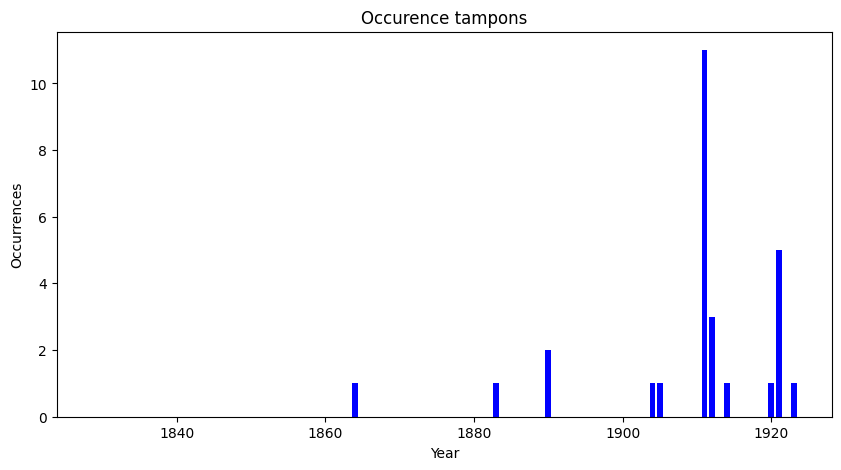

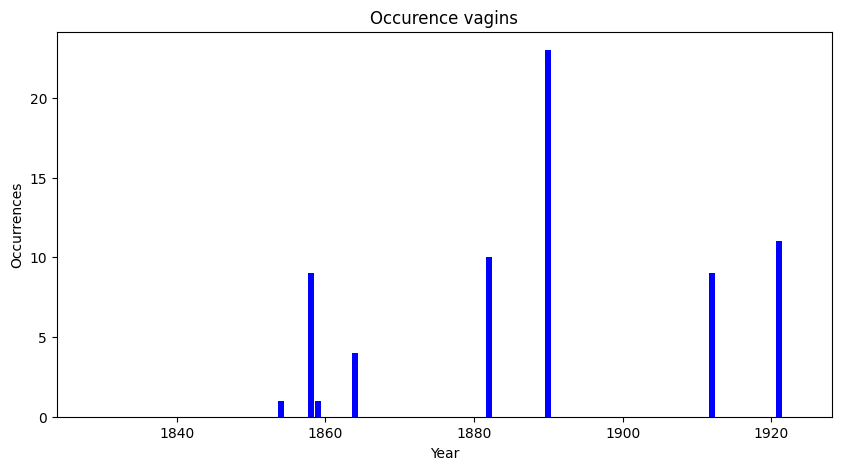

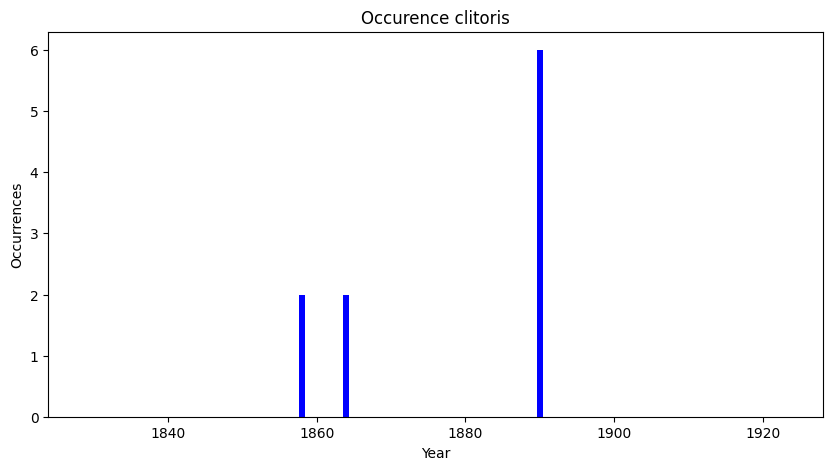

In [14]:
plot_word_occurrences_bar(total_eponges,'Occurence eponges')
plot_word_occurrences_bar(total_pessaires,'Occurence pessaires')
plot_word_occurrences_bar(total_preservatif,'Occurence preservatif')
plot_word_occurrences_bar(total_tampons,'Occurence tampons')
plot_word_occurrences_bar(total_vagins,'Occurence vagins')
plot_word_occurrences_bar(total_clitoris, 'Occurence clitoris')

# Essai 2

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def analyze_word_trends_by_year(folder_path, target_words):
    """
    Analyse l'évolution de certains mots en fonction des années.
    
    Arguments:
        folder_path : str : Chemin vers le dossier contenant les sous-dossiers par année.
        target_words : list : Liste des mots à analyser.
    """
    # Stocker les données d'occurrences par année
    word_trends = []

    # Parcourir chaque sous-dossier (chaque sous-dossier correspond à une année)
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith("_occurrences.csv"):  # Identifier les fichiers CSV
                year = os.path.basename(root)  # Le nom du sous-dossier est l'année
                file_path = os.path.join(root, file)

                # Charger le fichier CSV dans un DataFrame
                df = pd.read_csv(file_path)
                
                # Normaliser les mots pour supprimer les accents
                df['Mot'] = df['Mot'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

                # Filtrer uniquement les mots cibles
                word_counts = df[df['Mot'].isin(target_words)].copy()
                word_counts['Annee'] = year

                # Ajouter les données au tableau global
                word_trends.append(word_counts)

    # Combiner toutes les données dans un DataFrame unique
    combined_df = pd.concat(word_trends, ignore_index=True)
    
    # Pivot pour obtenir une vue par mot et année
    pivot_df = combined_df.pivot_table(index='Annee', columns='Mot', values='Occurences', aggfunc='sum', fill_value=0)
    
    # Trier par année
    pivot_df = pivot_df.sort_index()

    # Afficher le tableau des tendances
    print("\nÉvolution des mots par année :")
    print(pivot_df)

    # Générer un graphique des tendances
    pivot_df.plot(kind='line', figsize=(12, 6), marker='o')
    plt.title("Évolution des occurrences des mots par année")
    plt.xlabel("Année")
    plt.ylabel("Occurrences")
    plt.legend(title="Mots", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()




In [ ]:
# Exemple d'utilisation
folder_path = "chemin/vers/dossier_principal"  # Chemin vers le dossier contenant les sous-dossiers par année
target_words = ['chat', 'chien', 'maison']  # Liste des mots à analyser
analyze_word_trends_by_year(folder_path, target_words)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def analyze_common_base_word(folder_path, base_word):
    """
    Analyse l'apparition de tous les termes ayant une base commune (ex. : "preserva").
    
    Arguments:
        folder_path : str : Chemin vers le dossier contenant les sous-dossiers par année.
        base_word : str : Base commune des mots à analyser.
    """
    # Stocker les données d'occurrences par année
    word_trends = []

    # Parcourir chaque sous-dossier (chaque sous-dossier correspond à une année)
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith("_occurrences.csv"):  # Identifier les fichiers CSV
                year = os.path.basename(root)  # Le nom du sous-dossier est l'année
                file_path = os.path.join(root, file)

                # Charger le fichier CSV dans un DataFrame
                df = pd.read_csv(file_path)
                
                # Normaliser les mots pour supprimer les accents
                df['Mot'] = df['Mot'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

                # Filtrer les mots contenant la base commune
                base_word_counts = df[df['Mot'].str.contains(base_word, na=False)].copy()
                base_word_counts['Annee'] = year

                # Ajouter les données au tableau global
                word_trends.append(base_word_counts)

    # Combiner toutes les données dans un DataFrame unique
    combined_df = pd.concat(word_trends, ignore_index=True)

    # Agréger les données pour avoir une somme totale par année
    aggregated_df = combined_df.groupby('Annee')['Occurences'].sum().reset_index()

    # Afficher les résultats
    print("\nOccurrences totales pour la base commune '{}':".format(base_word))
    print(aggregated_df)

    # Générer un graphique des tendances
    plt.figure(figsize=(12, 6))
    plt.plot(aggregated_df['Annee'], aggregated_df['Occurences'], marker='o')
    plt.title(f"Évolution des occurrences des mots basés sur '{base_word}' par année")
    plt.xlabel("Année")
    plt.ylabel("Occurrences")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
# Exemple d'utilisation
folder_path = "chemin/vers/dossier_principal"  # Chemin vers le dossier contenant les sous-dossiers par année
base_word = "preserva"  # Base commune des mots à analyser
analyze_common_base_word(folder_path, base_word)

## Essai 3


In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Définir les termes recherchés
terms = ["preservatif", "preservatifs", "tampons", "tampon"]
terms_with_vagin = lambda word: "vagin" in word  # Filtrer les mots contenant "vagin"

# Lire le fichier "years.csv"
years_df = pd.read_csv("../data/contexte/years_mixtes_p2.csv")

# Préparer un DataFrame pour collecter les résultats
results = []

# Parcourir les titres des livres
for index, row in years_df.iterrows():
    title = row['Titre']
    year = row['Année']
    file_name = f"/Users/alexisfirome/Desktop/PDS/semester_project/data/occurences/ouvrages_mixtes/0{title}_occurrences.csv"
    
    # Vérifier si le fichier existe
    if os.path.exists(file_name):
        # Charger le fichier du livre
        book_df = pd.read_csv(file_name)
        
        # S'assurer qu'il y a une colonne pour les mots et leurs occurrences
        if 'Mot' in book_df.columns and 'Occurrences' in book_df.columns:
            # Filtrer les mots recherchés
            book_df['Mot'] = book_df['Mot'].str.lower()  # Normaliser en minuscule
            filtered_df = book_df[
                (book_df['Mot'].isin(terms)) |
                (book_df['Mot'].apply(terms_with_vagin))
            ]
            
            # Calculer les occurrences totales pour ces mots
            total_occurrences = filtered_df['Occurrences'].sum()
            
            # Ajouter les résultats pour cette année
            results.append({'Année': year, 'Occurrences': total_occurrences})
    else:
        print(f"Fichier {file_name} introuvable. Passer au suivant.")



In [ ]:
# Agréger les occurrences par année
results_per_year = results_df.groupby('Année')['Occurrences'].sum().reset_index()

# Trier les résultats par année
results_per_year = results_per_year.sort_values('Année')

# Visualiser les résultats
plt.figure(figsize=(10, 6))
plt.plot(results_per_year['Année'], results_per_year['Occurrences'], marker='o')
plt.title("Occurrences des termes au fil des années")
plt.xlabel("Année")
plt.ylabel("Occurrences")
plt.grid(True)
plt.show()